#predict employee churn:
#churn means quit service or not

Problem statement:The problem statement for an employee churn prediction dataset in machine learning 
is to develop a predictive model that can accurately identify which employees are likely to leave 
a company based on their historical data, allowing HR departments to proactively take steps to retain
valuable talent by identifying potential churn risks early on; essentially, using employee attributes
like satisfaction level, performance evaluations, tenure, and workload to forecast whether an employee
will voluntarily leave the organization in the near future.



objective:The objective of employee churn prediction is to identifyand analyze factors that contribute to employees leaving an organization, enabling businesses to proactively take measures to retain talent, improve employee satisfaction,and reduce turnover costs.

In [4]:
#Basic Library Import 
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [6]:
#load dataset
df=pd.read_csv("employee_data.csv")
#to show first five records from dataset
df.head() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,sales,low
1,0.80,0.86,5,262,6,0,1,0.0,sales,medium
2,0.11,0.88,7,272,4,0,1,0.0,sales,medium
3,0.72,0.87,5,223,5,0,1,0.0,sales,low
4,0.37,0.52,2,159,3,0,1,0.0,sales,low


 EDA (EXPLORATORY DATA ANALYSIS)

In [7]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD', nan], dtype=object)

In [8]:
df.shape

(11582, 10)

In [9]:
df["quit"].unique()

array([1, 0], dtype=int64)

In [10]:
#output column have categorical data so we go for classification


In [11]:
#chcek the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    1
department               1
salary                   1
dtype: int64

In [12]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
department                object
salary                    object
dtype: object

In [13]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,11582.000000,11582.000000,11582.000000,11582.000000,11582.000000,11582.000000,11582.000000,11581.000000
mean,0.628308,0.716608,3.802884,200.523053,3.305215,0.152651,0.172682,0.013816
std,0.241985,0.168828,1.169843,48.839268,1.209369,0.359666,0.377988,0.116731
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
#fillling null values on columns
a=df["promotion_last_5years"].median()
a
df["promotion_last_5years"].fillna(a,inplace=True)
#chcek the null values again
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               1
salary                   1
dtype: int64

In [15]:
#checking frequency to null values in object type data
df["department"].value_counts()


department
sales          3092
technical      2227
support        1790
IT              935
RandD           689
product_mng     638
marketing       633
accounting      611
hr              601
management      365
Name: count, dtype: int64

In [16]:
df["department"].fillna("sales",inplace=True)
#chcek the null values again
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   1
dtype: int64

In [17]:
#checking frequency to null values in object type data
df["salary"].value_counts()
df["salary"].fillna("low",inplace=True)
#chcek the null values again
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

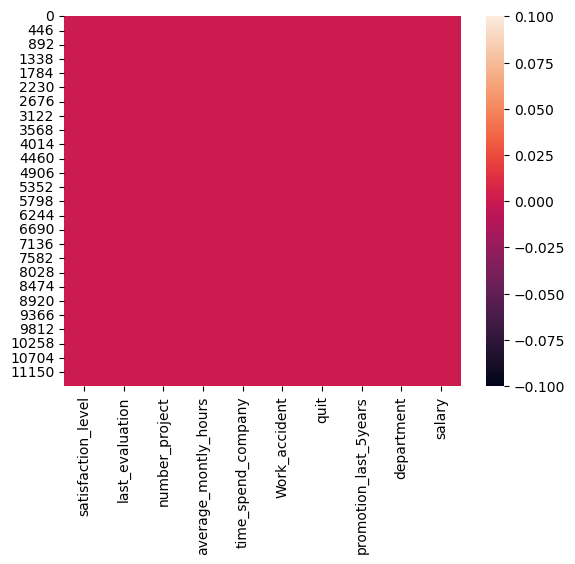

In [18]:
#visualize the null values 
sb.heatmap(df.isnull())
plt.show()

In [19]:
#chcek duplicate values
df.duplicated().sum()

9

In [20]:
#drop the duplicated values
df.drop_duplicates(inplace=True)

In [21]:
#chcek duplicate values again
df.duplicated().sum()

0

In [22]:
#chcek if data is balanced or not
df["quit"].value_counts()

quit
0    9582
1    1991
Name: count, dtype: int64

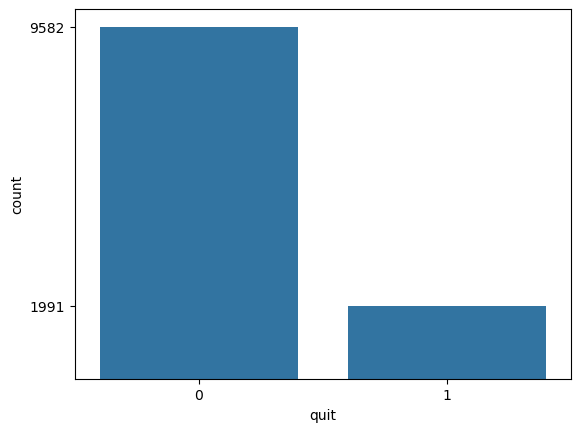

In [23]:
sb.countplot(data=df,x="quit")
f=df["quit"].value_counts()
plt.yticks(f)
plt.show()

department
sales          3087
technical      2227
support        1790
IT              934
RandD           688
product_mng     638
marketing       633
accounting      610
hr              601
management      365
Name: count, dtype: int64


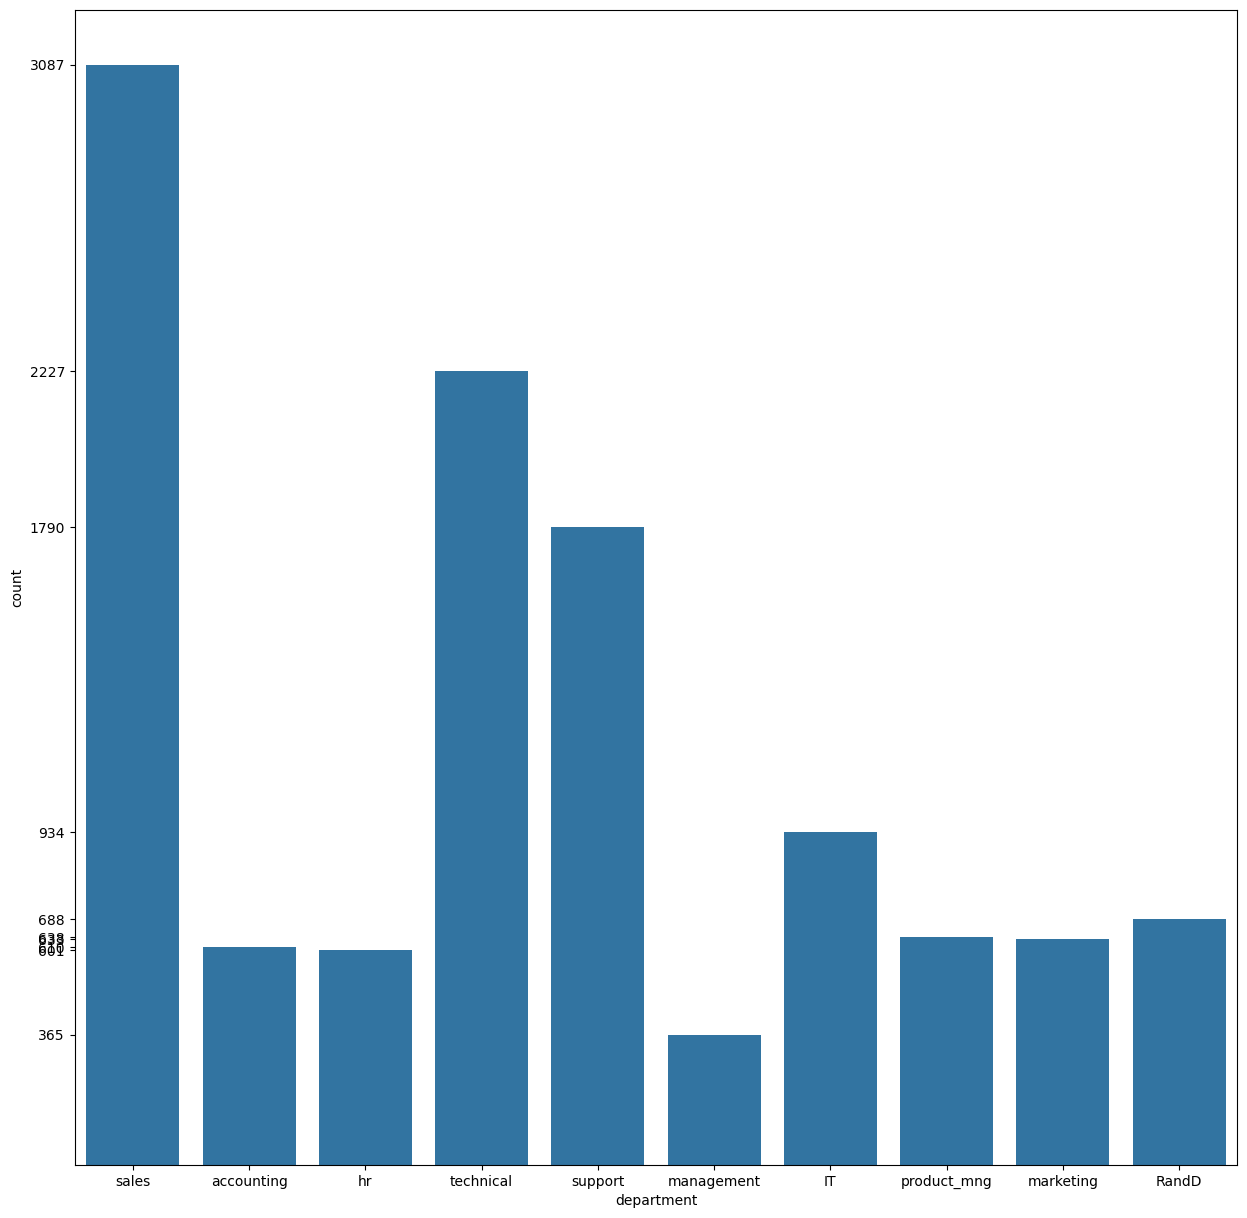

In [24]:
plt.figure(figsize=(15,15))
d=df['department'].value_counts()
print(d)
#visualise
sb.countplot(data=df,x="department")
plt.yticks(d)
plt.show()

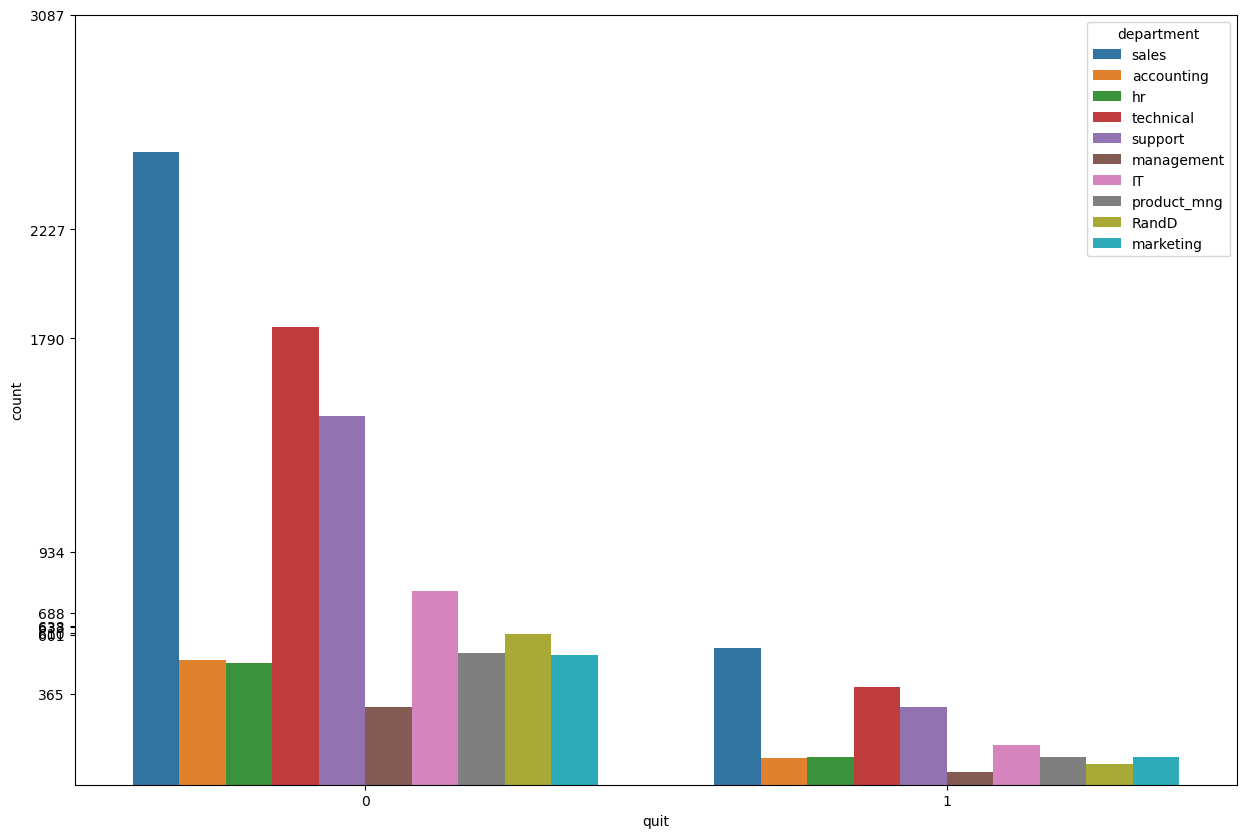

In [196]:
plt.figure(figsize=(15,10))
sb.countplot(data=df,x="quit",hue="department")
plt.yticks(d)
plt.show()
#not quit : 0
#quit : 1

salary
low       5576
medium    5096
high       901
Name: count, dtype: int64


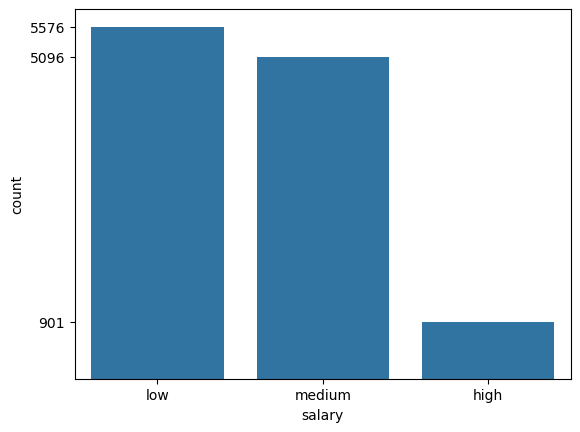

In [26]:
f=df['salary'].value_counts()
print(f)
#visualise
sb.countplot(data=df,x="salary")
plt.yticks(f)
plt.show()

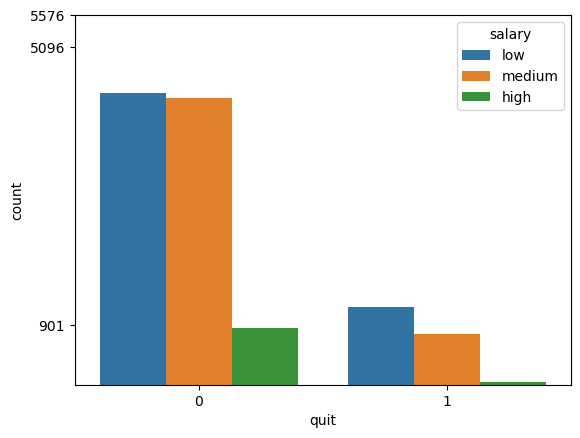

In [27]:

#visualise
sb.countplot(data=df,x="quit",hue="salary")
plt.yticks(f)
plt.show()
#not quit : 0
#quit : 1

Work_accident
0    9805
1    1768
Name: count, dtype: int64


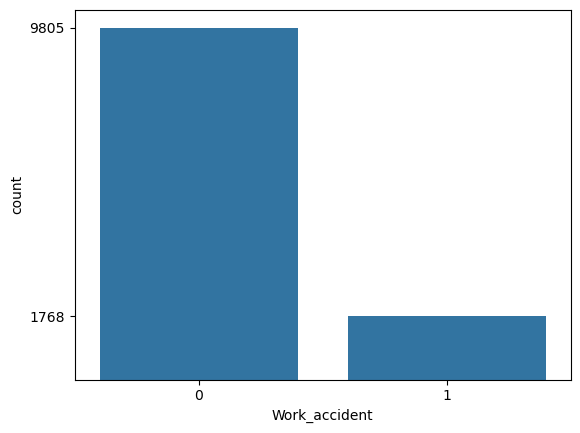

In [28]:
w=df['Work_accident'].value_counts()
print(w)
#visualise
sb.countplot(data=df,x="Work_accident")
plt.yticks(w)
plt.show()

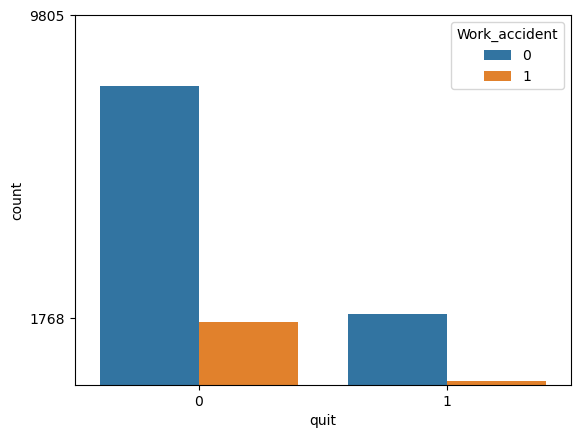

In [29]:
#visualise
sb.countplot(data=df,x="quit",hue="Work_accident")
plt.yticks(w)
plt.show()
#not quit : 0
#quit : 1

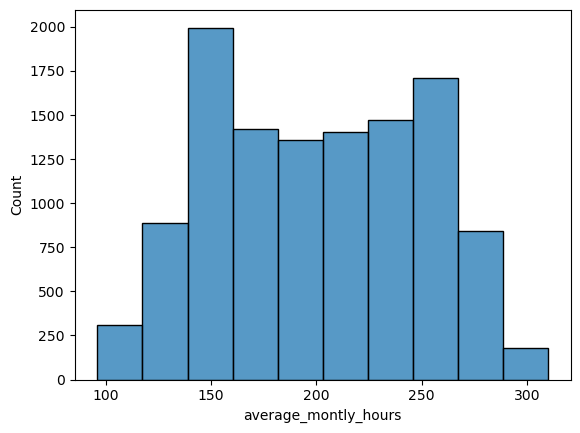

In [30]:
# Making a histplot for 'average_montly_hours' column

sb.histplot(df['average_montly_hours'],bins=10)
plt.show()

In [31]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
department                object
salary                    object
dtype: object

In [32]:
#data is unbalanced 
#splitting the data 
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(["int64","float64"])
df_num.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
dtype: object

In [33]:
df_cat.dtypes

department    object
salary        object
dtype: object

In [34]:
#apply LabelEncoder on df_cat
from sklearn.preprocessing import LabelEncoder
columns=df_cat.columns
for col in columns:
    #create object
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])


In [35]:
df_cat.head()

,department,salary
0,7,1
1,7,2
2,7,2
3,7,1
4,7,1


In [36]:
#concatenate df_cat and df_num
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0.0,7,1
1,0.80,0.86,5,262,6,0,1,0.0,7,2
2,0.11,0.88,7,272,4,0,1,0.0,7,2
3,0.72,0.87,5,223,5,0,1,0.0,7,1
4,0.37,0.52,2,159,3,0,1,0.0,7,1


In [37]:
df_new.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years    float64
department                 int32
salary                     int32
dtype: object

In [38]:
#splitting input and output
x=df_new.drop("quit",axis=1)
y=df_new["quit"]

In [39]:
x.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [40]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [41]:
y_train.ndim

1

In [42]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8101, 9), (3472, 9), (8101,), (3472,))

In [43]:
#first useing randomoversampler
from imblearn.over_sampling import RandomOverSampler

In [44]:
x_train.shape,y_train.shape

((8101, 9), (8101,))

In [45]:
x_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
283,0.10,0.93,6,289,4,1,0.0,8,1
4443,0.62,0.57,3,174,2,0,0.0,7,1
8437,0.60,0.40,3,146,4,1,0.0,9,1
8035,0.75,0.71,4,205,3,0,0.0,7,2
10640,0.85,0.66,4,155,4,0,0.0,3,0
...,...,...,...,...,...,...,...,...,...
7822,0.69,0.76,3,153,3,0,0.0,9,2
10964,0.52,0.43,3,176,3,0,0.0,8,1
907,0.09,0.86,6,291,4,0,0.0,6,1
5201,0.36,0.73,3,187,3,0,0.0,7,2


In [46]:
#from sklearn.preprocessing import StandardScaler
#creating object for StandardScaler class
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [47]:
x_train

array([[-2.18609134,  1.26212657,  1.90040627, ..., -0.12416681,
         0.72460002, -0.57863891],
       [-0.03122936, -0.8648485 , -0.68282398, ..., -0.12416681,
         0.38124574, -0.57863891],
       [-0.11410867, -1.8692534 , -0.68282398, ..., -0.12416681,
         1.06795429, -0.57863891],
       ...,
       [-2.22753099,  0.84854808,  1.90040627, ..., -0.12416681,
         0.03789146, -0.57863891],
       [-1.10866035,  0.08047375, -0.68282398, ..., -0.12416681,
         0.38124574,  1.02668774],
       [ 0.83900336,  0.78946544,  0.17825277, ..., -0.12416681,
        -0.6488171 , -0.57863891]])

In [48]:
#to convert minority class into majority class
#use RandomOverSampler
ros=RandomOverSampler(random_state=1)

In [49]:
#apply oversampler on training data
x_trainros,y_trainros=ros.fit_resample(x_train,y_train)

In [50]:
y_trainros.value_counts()

quit
1    6738
0    6738
Name: count, dtype: int64

In [51]:
x_trainros.shape,y_trainros.shape

((13476, 9), (13476,))

In [52]:
#also apply oversampler on testing data
x_testros,y_testros=ros.fit_resample(x_test,y_test)

In [53]:
#applying logistic algorithm

In [54]:
#import LogisticRagresion
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()

In [55]:
#create function
def create_model(model):
    #train the model with70% data
    model.fit(x_trainros,y_trainros)
    # test the model with 30% data
    y_pred=model.predict(x_testros)
    #genrate thye report
    print(classification_report(y_testros,y_pred))
    print(confusion_matrix(y_testros,y_pred))
    return model

#import libraries
from sklearn.metrics import classification_report,confusion_matrix

#call the function
lor=create_model(lor)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      2844
           1       0.78      0.79      0.79      2844

    accuracy                           0.78      5688
   macro avg       0.78      0.78      0.78      5688
weighted avg       0.78      0.78      0.78      5688

[[2213  631]
 [ 596 2248]]


In [56]:
#apply decision tree aglorithm for gini index
#perform DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#to create an object
dt=DecisionTreeClassifier(random_state=1) #by default gini index method


In [57]:
#call the function 
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2844
           1       0.98      0.92      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.95      0.95      0.95      5688
weighted avg       0.95      0.95      0.95      5688

[[2784   60]
 [ 216 2628]]


In [58]:
#to see imp features ,menas IG of each input 
dt.feature_importances_

array([0.43820738, 0.10394971, 0.03588649, 0.06751939, 0.3360422 ,
       0.00158612, 0.        , 0.01583505, 0.00097367])

In [59]:
dict={'Input':x.columns,'IG':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1

,Input,IG
0,satisfaction_level,0.438207
1,last_evaluation,0.103950
2,number_project,0.035886
3,average_montly_hours,0.067519
4,time_spend_company,0.336042
5,Work_accident,0.001586
6,promotion_last_5years,0.000000
7,department,0.015835
8,salary,0.000974


In [60]:
#to arrange records in desc -> highest to lowest 
df9=df1.sort_values('IG',ascending=False,ignore_index=True)
df9

,Input,IG
0,satisfaction_level,0.438207
1,time_spend_company,0.336042
2,last_evaluation,0.103950
3,average_montly_hours,0.067519
4,number_project,0.035886
5,department,0.015835
6,Work_accident,0.001586
7,salary,0.000974
8,promotion_last_5years,0.000000


In [61]:
#1. max_depth parameter 

In [62]:
#apply pruning technique for DTC using entropy
#max_depth<=8
'''
for i in range(1,9):
    dt=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("max_depth0:",i)
    #call the function
    dt=create_model(dt)
'''
dt1=DecisionTreeClassifier(random_state=1,max_depth=4)
# call function
dt1=create_model(dt1)



              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2844
           1       0.92      0.94      0.93      2844

    accuracy                           0.93      5688
   macro avg       0.93      0.93      0.93      5688
weighted avg       0.93      0.93      0.93      5688

[[2626  218]
 [ 169 2675]]


In [63]:
#2. min_samples
#create object of DecisionTreeClassifier class and pass the arguments
'''
for i in range(45,101):
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("min samples leaf:",i)
    #call the function 
    dt2=create_model(dt2)
'''
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
#call the function 
dt2=create_model(dt2)


              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2844
           1       0.97      0.93      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.95      0.95      0.95      5688
weighted avg       0.95      0.95      0.95      5688

[[2776   68]
 [ 205 2639]]


In [64]:
#conclusion : 
#Decision Tree Classifier with GINI Index : Recall 0.92  and Accuracy 0.95
#applied Pruning Tech : 1. max_depth with GINI INDEX then got 
# Recall: 0.94   and Accuracy: 0.93  and max_depth=4
#but applied pruning tech. 2. min_samples_leaf with GINI INDEX then got 
#Recall 0.93  and Accuracy 0.95  and min_samples_leaf=45

In [65]:
# create a tree again
'''
from sklearn import tree
features=x.columns
plt.figure(figsize=(10,10))
_=tree.plot_tree(dt2,feature_names=features,filled=True)
'''

'\nfrom sklearn import tree\n\n# Tree hamesha inputs/features pe banega, so inputs are in columns\nfeatures=x.columns\nplt.figure(figsize=(10,10))\n_=tree.plot_tree(dt2,feature_names=features,filled=True)\n'

In [66]:
#apply decision tree aglorithm for entropy index
#use entropy method:-p(yes)* log(p(yes))-Q(no)*log(Q(no))
#first create object for DecisionTreeClassifier class and 
#passing the parameter criterion ="entropy" by deafalut criterion="gini index" if didnot give
dt=DecisionTreeClassifier(random_state=1,criterion="entropy")
#call the function 
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2844
           1       0.98      0.92      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.95      0.95      0.95      5688
weighted avg       0.95      0.95      0.95      5688

[[2796   48]
 [ 225 2619]]


In [67]:
#apply pruning technique for DTC using entropy
#max_depth<=8
'''
for i in range(1,9):
    dt=DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=i)
    print("max_depth0:",i)
    #call the function
    dt=create_model(dt)
'''

dt=DecisionTreeClassifier(random_state=1,criterion="entropy",max_depth=4)
#call the function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2844
           1       0.99      0.93      0.96      2844

    accuracy                           0.96      5688
   macro avg       0.96      0.96      0.96      5688
weighted avg       0.96      0.96      0.96      5688

[[2806   38]
 [ 202 2642]]


In [68]:
#apply 2nd pruning technique min_samples_leaf
'''
for i in range(45,101):
    dt=DecisionTreeClassifier(random_state=1,criterion="entropy",min_samples_leaf=i)
    print("min_samples_leaf:",i)
    #call the function
    dt=create_model(dt)
'''
dt=DecisionTreeClassifier(random_state=1,criterion="entropy",min_samples_leaf=45)
#call the function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2844
           1       0.97      0.94      0.95      2844

    accuracy                           0.95      5688
   macro avg       0.95      0.95      0.95      5688
weighted avg       0.95      0.95      0.95      5688

[[2752   92]
 [ 184 2660]]


In [69]:
#conclusion : 
#Decision Tree Classifier with entropy Index :  Recall 0.92  and Accuracy 0.95
#applied Pruning Tech : 1. max_depth with entropy then got 
#Recall 0.92  and Accuracy 0.96  and max_depth=4
#but applied pruning tech. 2. min_samples_leaf with entropy then got 
#Recall 0.94  and Accuracy 0.95  and min_samples_leaf=45


In [70]:
#checking features
x.shape

(11573, 9)

In [71]:
#ENSEMBLING TECHNIQUE: RANDOM FOREST TREE
#call random forest tree from package use gini index
from sklearn.ensemble import RandomForestClassifier
#create a object of RandomForestClassifier class()
rfc=RandomForestClassifier(n_estimators=10,max_features=3,random_state=1)
#estimators means how many decisiontreeclassifiers min=10 ,max=100
#max_features means take how many inputs
#bydefalut it took GINI INDEX

#call the function    
rfc=create_model(rfc)

"""
for i in range(6,0,-1):
    #create object for RandomForestClassifier class
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)
    print("no of features:",i)
    #call the function
    rfc=create_model(rfc)

"""


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2844
           1       1.00      0.92      0.96      2844

    accuracy                           0.96      5688
   macro avg       0.96      0.96      0.96      5688
weighted avg       0.96      0.96      0.96      5688

[[2831   13]
 [ 233 2611]]


'\nfor i in range(6,0,-1):\n    #create object for RandomForestClassifier class\n    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)\n    print("no of features:",i)\n    #call the function\n    rfc=create_model(rfc)\n\n'

In [72]:
# use entropy
"""
for i in range(6,0,-1):
    #create object for RandomForestClassifier class
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1,criterion="entropy")
    print("no of features:",i)
    #call the function
    rfc=create_model(rfc)
"""

rfc=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1,criterion="entropy")
#call the function
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2844
           1       1.00      0.92      0.96      2844

    accuracy                           0.96      5688
   macro avg       0.96      0.96      0.96      5688
weighted avg       0.96      0.96      0.96      5688

[[2834   10]
 [ 224 2620]]


In [73]:
#random forest  with gini Index :   Recall 0.92  and Accuracy 0.96 fe=3
# random forest with entropy Index :   Recall 0.92  and Accuracy 0.96 fe=2
#best method randomforesttree(entropy):features=2 (96%) 

In [74]:
#USE BOOSTING TECHNIQUE:
#apply ADA bost on given dataset
from sklearn.ensemble import AdaBoostClassifier

In [75]:
#create the object AdaBoostClassifier class#by deafalut gini index
ada=AdaBoostClassifier(n_estimators=5,random_state=1)
#call the function
ada=create_model(ada)
#n_estimators means no. of decision stump can be <=100_estimators can be <=100
"""
for i in range(1,7):
    #create object for RandomForestClassifier class
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("no of descision stump:",i)
    #call the function
    ada=create_model(ada)

"""

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      2844
           1       0.88      0.95      0.91      2844

    accuracy                           0.91      5688
   macro avg       0.91      0.91      0.91      5688
weighted avg       0.91      0.91      0.91      5688

[[2472  372]
 [ 152 2692]]


'\nfor i in range(1,7):\n    #create object for RandomForestClassifier class\n    ada=AdaBoostClassifier(n_estimators=i,random_state=1)\n    print("no of descision stump:",i)\n    #call the function\n    ada=create_model(ada)\n\n'

In [76]:
#conclusion :#adaboosting  recall score :   1-0.95 and 0 - 0.91 on decision stump:5

In [77]:
#Gradient Boosting :
#apply gradient Boost technuique on bank dataset
from sklearn.ensemble import GradientBoostingClassifier
#create the object GradientBoostClassifier class#by deafalut gini index
gbc=GradientBoostingClassifier(n_estimators=10,random_state=1)
#n_estimators means no. of iteration of decision stump can be <=100_estimators can be <=100
#call the function
gbc=create_model(gbc)
'''
for i in range(10,101):
    #create object for RandomForestClassifier class
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("no of descision stump:",i)
    #call the function
    gbc=create_model(gbc)
'''

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2844
           1       0.92      0.94      0.93      2844

    accuracy                           0.93      5688
   macro avg       0.93      0.93      0.93      5688
weighted avg       0.93      0.93      0.93      5688

[[2611  233]
 [ 182 2662]]


'\nfor i in range(10,101):\n    #create object for RandomForestClassifier class\n    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)\n    print("no of descision stump:",i)\n    #call the function\n    gbc=create_model(gbc)\n'

In [78]:
#conclusion :#gradientboosting  recall score :   1-0.94 and Accuracy 0.93 on decision stump:10

In [79]:
#Extreme Gradient Boosting(XGB)
#!pip install xgboost
#call 
from xgboost import XGBClassifier

In [80]:
#create object for XGBClassifier class
xgc=XGBClassifier(n_estimators=10,reg_alpha=10,random_state=1)
#automatic overftting : reg means regualrization  and alpha or lambda:
#hyperpermater
#n_estimators means no. of iteration of decision stump can be <=100_estimators can be <=100
#call the function
xgc=create_model(xgc)

'''
for i in range(10,101):
    #create object for RandomForestClassifier class
    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print("no of descision stump:",i)
    #call the function
    xgc=create_model(xgc)

'''

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2844
           1       0.99      0.92      0.95      2844

    accuracy                           0.96      5688
   macro avg       0.96      0.96      0.96      5688
weighted avg       0.96      0.96      0.96      5688

[[2811   33]
 [ 217 2627]]


'\nfor i in range(10,101):\n    #create object for RandomForestClassifier class\n    xgc=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)\n    print("no of descision stump:",i)\n    #call the function\n    xgc=create_model(xgc)\n\n'

In [81]:
#conclusion :# extreme   recall score :   1-0.92 and 0 - 0.96 on decision stump:10

In [82]:
#so far best one extreme XGBClassifier recall 0=0.92 and 1=0.96

In [83]:
#use SVM : support vector machine : - classification algorithm
#1. Linear kernel function of SVM : means suppose data are linearly separatable with the help of 
#straight line 
#call class LinearSVC inbuilt class
from sklearn.svm import LinearSVC

In [84]:
#create the object of LinearSVC class
svc=LinearSVC(random_state=1) #hard margin

In [85]:
#call function 
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2844
           1       0.77      0.78      0.78      2844

    accuracy                           0.78      5688
   macro avg       0.78      0.78      0.78      5688
weighted avg       0.78      0.78      0.78      5688

[[2193  651]
 [ 627 2217]]


In [86]:
#here recall is 0.78 which is good but we can more better
#means can be possible ,model is overfit  why? because outlier can be present
#in our dataset
#perhaps , can be less error on training time but more error on testing time ,
#means training error <testing error means model is overfit 
#what  do we do ,
#add some external error during training time   means use concept soft margin
#if create a object of LinearSVC class 

In [87]:
#Soft margin means to reduced overfitting situation means some error add on
#training time 
#create object of LinearSVC class
svc1=LinearSVC(random_state=1,C=0.9) #here C is parameter which is used to
#add some error on training time set error 0.01

In [88]:
#call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      2844
           1       0.77      0.78      0.78      2844

    accuracy                           0.78      5688
   macro avg       0.78      0.78      0.78      5688
weighted avg       0.78      0.78      0.78      5688

[[2193  651]
 [ 627 2217]]


In [89]:
#if add external error during training time , no changes in score(recall)
#means data is non-linear
#can be possible , dataset is not linear means dataset is non-linear  .
#use Non-linear kernal function of SVM means 2 classes are not separatable 
#with straight line 
#There are 3 types of Kernal function of SVM
#1. Linear SVC  : use for linear data
#2. polynomial kernal function : increase the low dimension to high dimension
#3. radial basis kernal function

#here use 2. polynomial kernal function : increase the low dimension to 
#high dimension

In [90]:
#2. polynomial Kernel function 
from sklearn.svm import SVC 
#SVC inbuilt class for non-linear data(poly and radial basis)

In [91]:
#create object of SVC class(for polynomial)
poly_svc=SVC(random_state=1,kernel="poly")

In [92]:
#call function
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2844
           1       0.95      0.93      0.94      2844

    accuracy                           0.94      5688
   macro avg       0.94      0.94      0.94      5688
weighted avg       0.94      0.94      0.94      5688

[[2714  130]
 [ 203 2641]]


In [93]:
##we use 3 . non-linear : radial basis kernel function
#create object of SVC class(for radial-basis)
r_svc=SVC(random_state=1,kernel='rbf') #rdf means radial basis function

In [94]:
#call function
r_svc=create_model(r_svc)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2844
           1       0.96      0.93      0.94      2844

    accuracy                           0.94      5688
   macro avg       0.94      0.94      0.94      5688
weighted avg       0.94      0.94      0.94      5688

[[2732  112]
 [ 209 2635]]


''' Best Algorithm in employee churn dataset :

Extreme Gradient Boost & RandomForestClassifier . In XGB : Accuracy 96% and recall 92% In RandomForestClassifier : Accuracy : 96% and Recall : 92%

 Algorithm      Name          Accuracy          Recall  



'''